In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('../../../../data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Средний возраст выживших '+str(df[df['Survived']==1]['Age'].mean()))
print('Средний возраст выживших женщин: '+str(df[(df['Sex']=='female')&(df['Survived']==1)]['Age'].mean()))
print('Средний возраст выживших мужчин: '+str(df[(df['Sex']=='male')&(df['Survived']==1)]['Age'].mean()))

Средний возраст выживших 28.343689655172415
Средний возраст выживших женщин: 28.84771573604061
Средний возраст выживших мужчин: 27.276021505376345


In [4]:
print("Таблица сопряжённости для выживаемости и пола")
print("Отсюда видно, что доля выживших женщин больше, чем доля выживших мужчин")
pd.crosstab(df['Survived'], df['Sex'], normalize=True)

Таблица сопряжённости для выживаемости и пола
Отсюда видно, что доля выживших женщин больше, чем доля выживших мужчин


Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [5]:
print("Максимальный возраст и максимальная цена для каждого класса")
df['Age']=df['Age'].astype('float')
df['Fare']=df['Fare'].astype('float')
df.pivot_table(['Age','Fare'],['Pclass'], aggfunc="max").head(10)

Максимальный возраст и максимальная цена для каждого класса


,Age,Fare
Pclass,,
1,80.0,512.3292
2,70.0,73.5000
3,74.0,69.5500


In [6]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

from pylab import rcParams
rcParams['figure.figsize']=8,5

Относительное количество выживших по 3-м классам
Из графика видно, что в 3-м классе самая низкая выживаемость


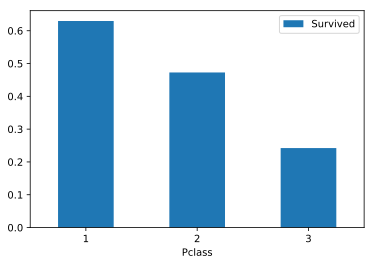

In [7]:
print('Относительное количество выживших по 3-м классам')
print("Из графика видно, что в 3-м классе самая низкая выживаемость")

df1=df[['Survived'] + ['Pclass']]
df1=((df1.groupby('Pclass').sum())/(df1.groupby('Pclass').count()))
df1.plot(kind='bar', rot=0)

Среднее количество выживших при разном количестве родственников.
Из этого графика видно, что наибольшая выживаемость наблюдается у пассажиров с одним родственником,
и при увеличении количества родственников уменьшается количество выживших.


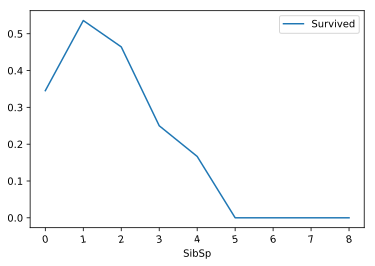

In [10]:
print('Среднее количество выживших при разном количестве родственников.')
print('Из этого графика видно, что наибольшая выживаемость наблюдается у пассажиров с одним родственником,')
print('и при увеличении количества родственников уменьшается количество выживших.')

df1=df[['Survived'] + ['SibSp']]
df1=df1.groupby('SibSp').mean()
df1.plot(rot=9)

In [13]:
print('Проверим, есть ли зависимость между количеством выживших и количеством родственников для каждого класса')
df1=df[['Survived'] + ['Pclass']]
df1=((df1.groupby('Pclass').sum())/(df1.groupby('Pclass').count()))#относительное количество выживших для каждого класса
df2=df[['SibSp'] + ['Pclass']]
df2=df2.groupby('Pclass').mean()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

trace0=go.Bar(
    x=df1.index,
    y=df1.Survived,
    name='Относительное количество выживших')

trace1=go.Bar(
    x=df2.index,
    y=df2.SibSp,
    name='Среднее количество родственников'
)

data=[trace0, trace1]
layout={'xaxis':{'title':'Pclass'}}

fig=go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
print("Как видно из этого графика в третьем классе самое большое кличество родственников и самая низкая выживаемость")

Проверим, есть ли зависимость между количеством выживших и количеством родственников для каждого класса


Как видно из этого графика в третьем классе самое большое кличество родственников и самая низкая выживаемость


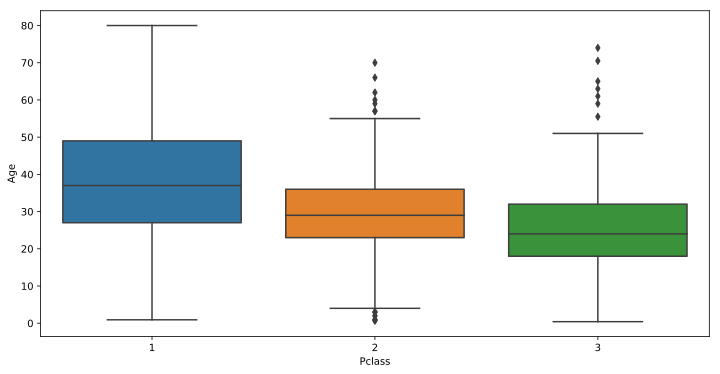

In [49]:
_,axes = plt.subplots(1,1, sharey=True, figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=df, ax=axes);
print("Медианный возраст для 1-го класса ≈ 38, для 2-го ≈ 28, для 3-го ≈ 22")
print('Большая часть значений возрастов находится в пределах от ≈ 20 до ≈ 48 лет')